<a href="https://colab.research.google.com/github/AW17321/ACFT-PRT-OCR/blob/main/Handwriting_Recognition_for_ACFT_%26_PRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pytesseract

In [ ]:
#!apt-get update -qq && apt-get install -qq tesseract-ocr
#!pip install --quiet pytesseract opencv-python-headless
import pytesseract
from pytesseract import Output
from PIL import Image
import cv2

img_path1 = 'image.jpg'
text = pytesseract.image_to_string(img_path1,lang='eng')
# Set a confidence threshold
confidence = 30

# Draw bounding boxes and overlay recognized text
for i, text in enumerate(data['text']):
    txt = text.strip()
    conf = float(data['conf'][i])
    if txt and conf > confidence:
        x, y, w, h = (data['left'][i], data['top'][i],
                      data['width'][i], data['height'][i])

        # Draw green rectangle
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Put text in red above the box
        cv2.putText(img, txt, (x, y - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)

#Display annotated image inline
cv2_imshow(img)

#Print
print("\nOCR Results:")
for i, text in enumerate(data['text']):
    txt = text.strip()
    conf = float(data['conf'][i])
    if txt and conf > confidence:
        print(f'• "{txt}" (confidence: {conf:.0f})')

easyOCR

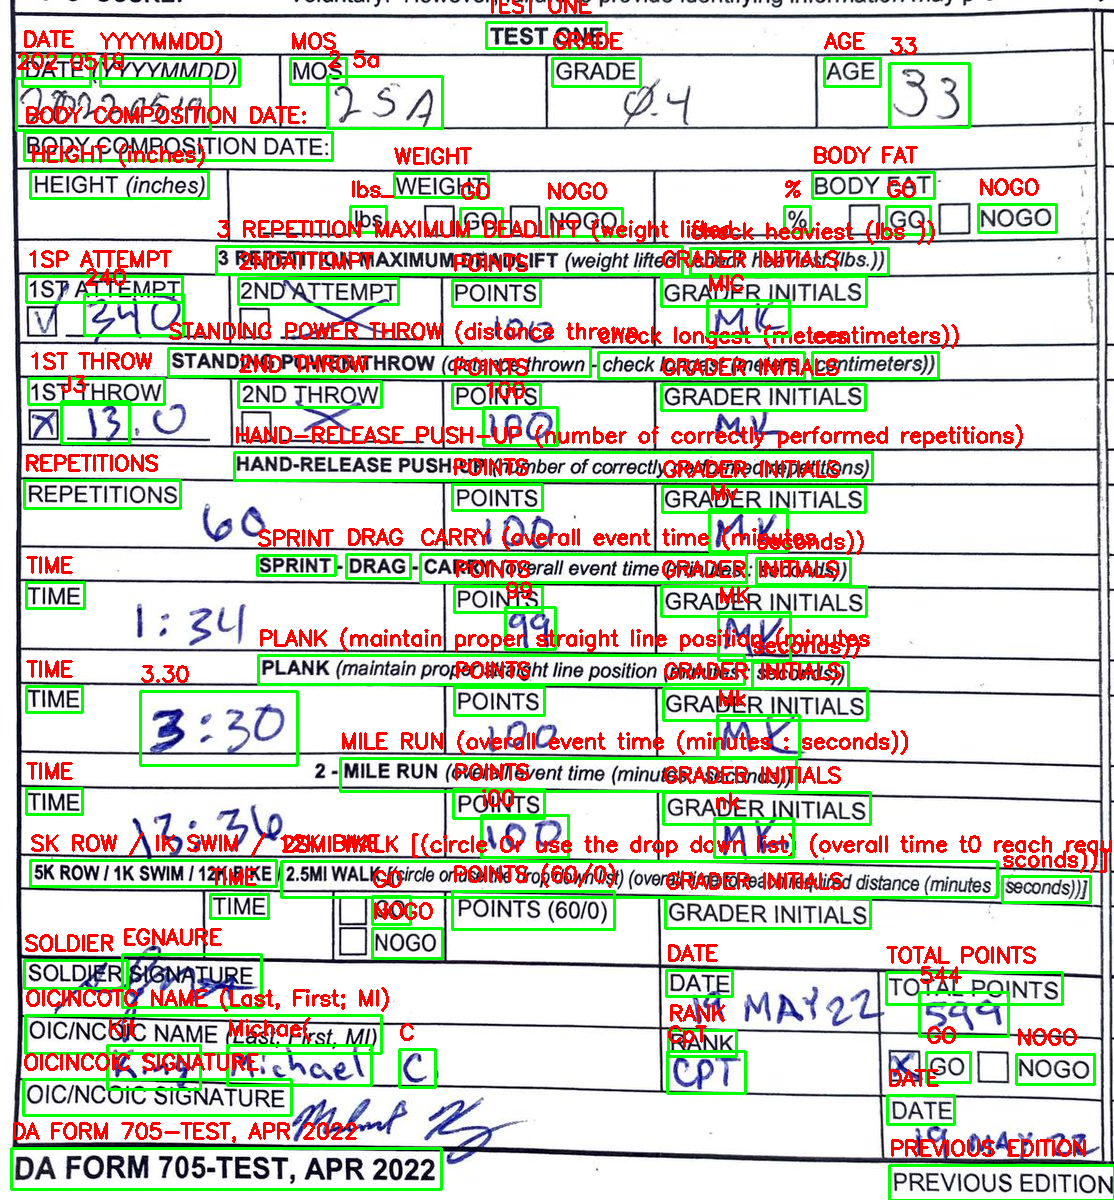


 OCR Results:
• "TEST ONE" (0.72)
• "DATE" (1.00)
• "YYYYMMDD)" (1.00)
• "MOS" (1.00)
• "GRADE" (1.00)
• "AGE" (1.00)
• "202 0519" (0.67)
• "2 5a" (0.34)
• "06.4" (0.27)
• "33" (0.62)
• "BODY COMPOSITION DATE:" (0.73)
• "HEIGHT (inches)" (0.95)
• "WEIGHT" (1.00)
• "BODY FAT" (1.00)
• "Ibs_" (0.99)
• "GO" (0.99)
• "NOGO" (1.00)
• "%" (1.00)
• "GO" (0.93)
• "NOGO" (1.00)
• "3 REPETITION MAXIMUM DEADLIFT (weight lifted" (0.65)
• "check heaviest (Ibs ))" (0.80)
• "1SP ATTEMPT" (0.86)
• "2NDATTEMPT" (0.99)
• "POINTS" (1.00)
• "GRADER INITIALS" (0.71)
• "240" (0.93)
• "ioo" (0.12)
• "STANDING POWER THROW (distance thrown" (0.93)
• "check longest (meters" (0.99)
• "centimeters))" (1.00)
• "1ST THROW" (0.76)
• "2ND THROW" (0.97)
• "POINTS" (1.00)
• "GRADER INITIALS" (1.00)
• "J3" (0.80)
• "100" (0.97)
• "ML" (0.14)
• "HAND-RELEASE PUSH-UP (number of correctly performed repetitions)" (0.60)
• "REPETITIONS" (0.77)
• "POINTS" (1.00)
• "GRADER INITIALS" (0.67)
• "L00" (0.16)
• "Mv" (0.72)
• "SPRI

In [ ]:
#easy ocr basic
#!pip install easyocr

import easyocr
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

reader = easyocr.Reader(['en'], gpu=True)

def draw_bounding_boxes(image, detections, threshold=0.3):
    img = image.copy()
    for bbox, text, score in detections:
        if score >= threshold:
            # Extract box coordinates
            (top_left, top_right, bottom_right, bottom_left) = bbox
            tl = tuple(map(int, top_left))
            br = tuple(map(int, bottom_right))
            # Draw rectangle and annotate text
            cv2.rectangle(img, tl, br, (0, 255, 0), 2)
            cv2.putText(img, text, (tl[0], tl[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    return img

image_path = '/content/image.jpg'
image = cv2.imread(image_path)
detections = reader.readtext(image)  # returns [([bbox], text, confidence), ...]

annotated = draw_bounding_boxes(image, detections, threshold=0.3)

cv2_imshow(annotated)
print("\n OCR Results:")
for bbox, text, score in detections:
    print(f"• \"{text}\" ({score:.2f})")


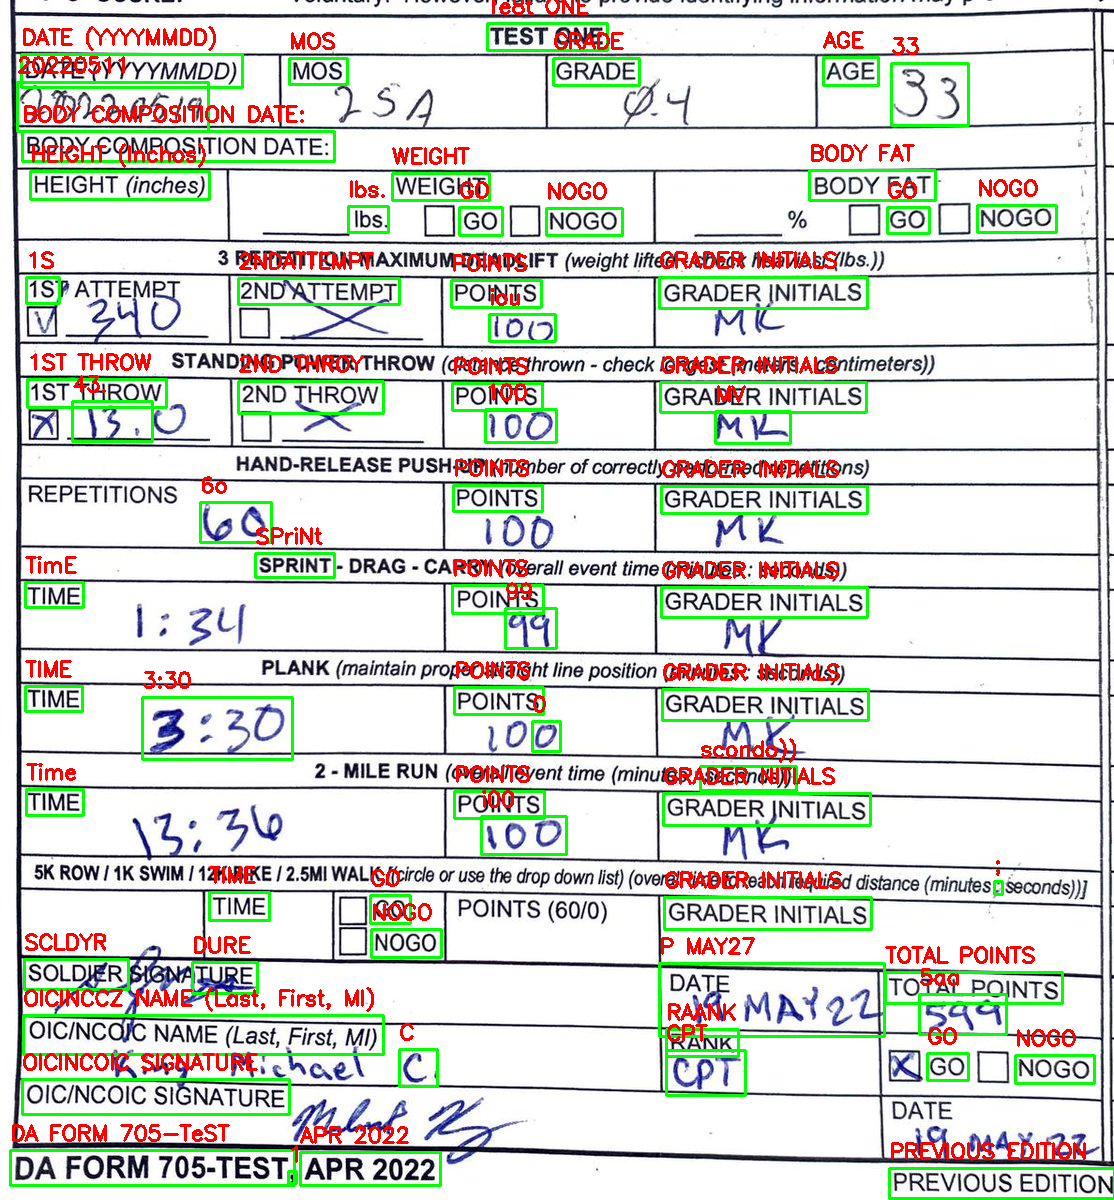


OCR Results:
• "Te8t ONE" (0.49)
• "DATE (YYYYMMDD)" (0.98)
• "MOS" (0.89)
• "GRADE" (1.00)
• "AGE" (1.00)
• "20220511" (0.58)
• "2 5 A" (0.16)
• "33" (1.00)
• "BODY COMPOSITION DATE:" (0.83)
• "HEiGHT (Inchos)" (0.44)
• "WEIGHT" (1.00)
• "BODY FAT" (0.99)
• "Ibs." (0.89)
• "GO" (0.94)
• "NOGO" (0.99)
• "GO" (0.42)
• "NOGO" (1.00)
• "J Repltitkon MAXimuM dEADLIT (mormxMed" (0.03)
• "choxkhosvbst (*x))" (0.11)
• "1S" (0.55)
• "2NDATTEMPT" (0.44)
• "POINTS" (1.00)
• "GRADER INITIALS" (0.62)
• "TZENU" (0.12)
• "iou" (0.71)
• "Standing Fower THROW (d*tx) ttvow" (0.02)
• "cxkbnd (meters : aotbotoro))" (0.06)
• "1ST THROW" (0.59)
• "2ND THROY" (0.48)
• "POINTS" (1.00)
• "GRADER INITIALS" (0.96)
• "43." (0.57)
• "100" (0.95)
• "MV" (0.46)
• "Hand-ReLEaSe Puch-NP (maor dcamcty porkmod roacttions)" (0.01)
• "REPeTITIONS" (0.19)
• "POINTS" (0.66)
• "GRADER INITIALS" (0.81)
• "6o" (0.50)
• "ioo" (0.21)
• "SPriNt" (0.60)
• "DraG" (0.18)
• "CARRY (ovoeIohont fmo (miunos : socondo))" (0.02)
• "TimE

In [ ]:
#easy ocr with preprocessing
#!pip install easyocr

import easyocr
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

reader = easyocr.Reader(['en'], gpu=True)

def preprocess(img: np.ndarray) -> np.ndarray:
    """
    Preprocess image to enhance OCR accuracy:
      • Convert to grayscale
      • Apply Gaussian blur to reduce noise
      • Apply inverse binary threshold (Otsu's method)
      • Resize for better clarity
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, inv_thr = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Resize
    height, width = inv_thr.shape
    return cv2.resize(inv_thr, (width * 2, height * 2), interpolation=cv2.INTER_CUBIC)

def draw_bounding_boxes(image, detections, threshold=0.3):
    img = image.copy()
    for bbox, text, score in detections:
        if score >= threshold:
            tl = tuple(map(int, bbox[0]))
            br = tuple(map(int, bbox[2]))
            cv2.rectangle(img, tl, br, (0, 255, 0), 2)
            cv2.putText(img, text, (tl[0], tl[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    return img

#Load and preprocess image
image_path = '/content/image.jpg'
original = cv2.imread(image_path)
proc = preprocess(original)

detections = reader.readtext(proc)

#Draw boxes on scaled-down original for display consistency
scale_x = original.shape[1] / proc.shape[1]
scale_y = original.shape[0] / proc.shape[0]
scaled = original.copy()
#Adjust detection boxes back to original scale
scaled_detections = []
for bbox, text, score in detections:
    scaled_bbox = [
        [bbox[i][0] * scale_x, bbox[i][1] * scale_y]
        for i in range(4)
    ]
    scaled_detections.append((scaled_bbox, text, score))

annotated = draw_bounding_boxes(scaled, scaled_detections, threshold=0.3)

#Display results
cv2_imshow(annotated)
print("\nOCR Results:")
for _, text, score in scaled_detections:
    print(f"• \"{text}\" ({score:.2f})")


Doctr

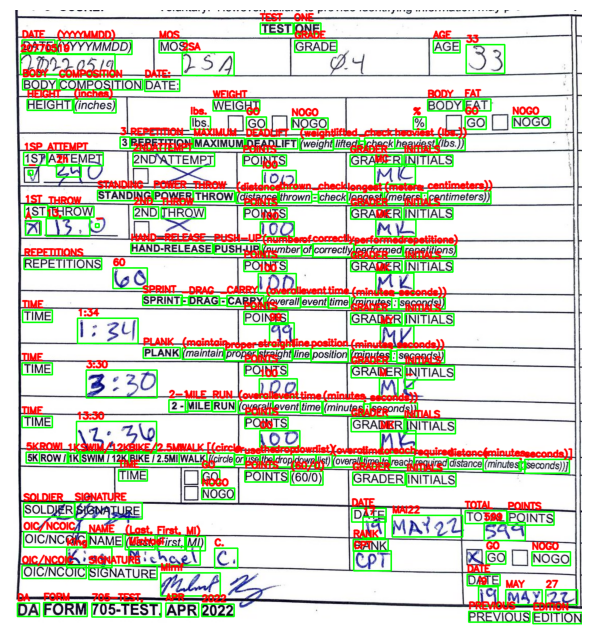

Results:
• TEST ONE
• DATE (YYYYMMDD)
• MOS
• GRADE
• AGE
• 20770519
• 2SA
• 33
• BODY COMPOSITION DATE:
• HEIGHT (inches)
• WEIGHT
• BODY FAT
• Ibs.
• GO
• NOGO
• %
• GO
• NOGO
• 3 REPETITION MAXIMUM DEADLIFT (weight lifted - check heaviest (Ibs.))
• 1SP ATTEMPT
• 2NDATTEMPT
• POINTS
• GRADER INITIALS
• -
• 2h
• MC
• IO0
• STANDING POWER THROW (distance thrown - check longest (meters : centimeters))
• 1ST THROW
• 2ND THROW
• POINTS
• GRADER INITIALS
• A 13, -
• 100
• MK
• HAND-RELEASE PUSH-UP (number of correctly performed repetitions)
• REPETITIONS
• POINTS
• GRADER INITIALS
• 60
• 100
• MK
• SPRINT - DRAG - CARRY (overall event time (minutes : seconds))
• TIME
• POINTS
• GRADER INITIALS
• 1:34
• 99
• MY
• PLANK (maintain proper straight line position (minutes : seconds))
• TIME
• POINTS
• GRADER INITIALS
• 3:30
• 100
• M -
• 2-1 MILE RUN (overall event time (minutes : seconds))
• TIME
• POINTS
• GRADER INITIALS
• 13:30
• O0
• MK
• 5K ROWI 1K SWIM/12K BIKE/2.5MI WALK [(circle or use 

In [ ]:
#!pip install --quiet python-doctr[torch] matplotlib opencv-python-headless

import cv2
import numpy as np
import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

doc = DocumentFile.from_images('/content/image.jpg')
model = ocr_predictor(pretrained=True)
result = model(doc)

img = cv2.imread('/content/image.jpg')
h, w = img.shape[:2]

for page in result.pages:
    for block in page.blocks:
        for line in block.lines:
            for word in line.words:
                (xmin_rel, ymin_rel), (xmax_rel, ymax_rel) = word.geometry
                xmin, ymin = int(xmin_rel * w), int(ymin_rel * h)
                xmax, ymax = int(xmax_rel * w), int(ymax_rel * h)

                cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

                cv2.putText(
                    img,
                    word.value,
                    (xmin, max(ymin - 5, 0)),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    (0, 0, 255),
                    2,
                    cv2.LINE_AA
                )

plt.figure(figsize=(10, 8))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

print("Results:")
for page in result.pages:
    for block in page.blocks:
        for line in block.lines:
            line_text = " ".join(word.value for word in line.words)
            print(f"• {line_text}")


trOCR

In [ ]:
!pip install --quiet python-doctr[torch] transformers pillow matplotlib opencv-python-headless

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


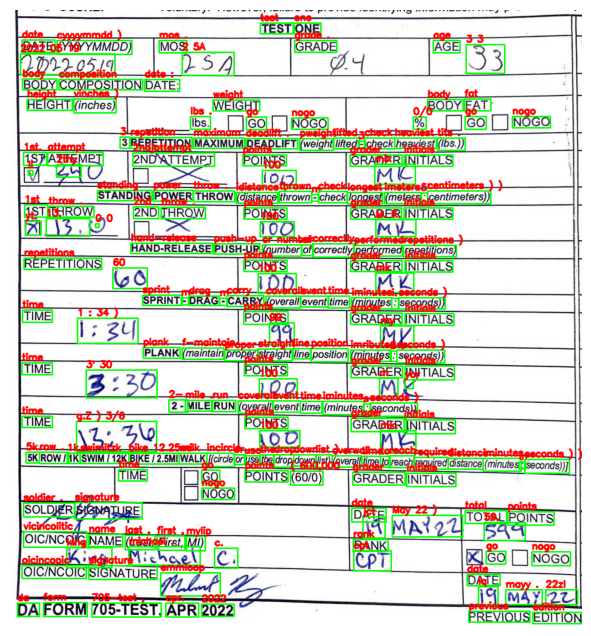

Handwriting Results:


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image

# Step 1: Load handwritten TrOCR model
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
trocr = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# Step 2: Use doctr to detect word regions
doc = DocumentFile.from_images('/content/image.jpg')
detector = ocr_predictor(pretrained=True)
doc_result = detector(doc)

# Step 3: Read original image
img = cv2.imread('/content/image.jpg')
h, w = img.shape[:2]

# Prepare overlay image
overlay = img.copy()

# Step 4: For each word detected, apply TrOCR
for page in doc_result.pages:
    for block in page.blocks:
        for line in block.lines:
            for word in line.words:
                val = word.value
                if not val.strip():
                    continue

                (xmin_r, ymin_r), (xmax_r, ymax_r) = word.geometry
                xmin, ymin = int(xmin_r * w), int(ymin_r * h)
                xmax, ymax = int(xmax_r * w), int(ymax_r * h)

                # Crop word region
                crop = img[ymin:ymax, xmin:xmax]
                if crop.size == 0:
                    continue

                # Preprocess and run TrOCR
                pil = Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
                pixel_vals = processor(images=pil, return_tensors="pt").pixel_values
                output_ids = trocr.generate(pixel_vals)
                text = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()

                # Draw box and overlay recognized text
                cv2.rectangle(overlay, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
                cv2.putText(overlay, text, (xmin, ymin - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6,
                            (0, 0, 255), 2, cv2.LINE_AA)

# Step 5: Display the result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Step 6: Print full recognized text per line
print("Handwriting Results:")
for page in doc_result.pages:
    for block in page.blocks:
        for line in block.lines:
            words = []
            (h0, w0) = img.shape[:2]
            for word in line.words:
                # re-run crop & recognition or cache results as needed
                pass
            # Ideally, combine word-level TrOCR outputs in same sequence as drawn
        # (For brevity, we skip printing combined line text)
